# Recent advance of the estimation of shannon's entropy, mutual information and transfer entropy
## In this script, the shannon entropy is intepreted in detail. Estimation based on observation has been provided
### Maximum-likelihood (ML) estimate of the discretized frequency distribution
The empirical entropy  $H(p(\vec{x_n}))=-\frac{1}{n}log\hat{p}(\vec{x_n})$ with $\hat{p}$ being the empirical point probabilities. It is also called plug-in universal estimator for shannon's entropy. 
$$\hat{p(x)}=\frac{1}{n}\sum^n_{i=1}\delta_x(x_i)$$ where $x_i$ is $i^{th}$ observation

<mark>Where is the connection between ML and shannon's empirical entropy?:
    if a random variable T takes only discrete values then the empirical distribution is the maximum likelihood estimator. Besides, one should notice that the functional invariance of the ML estimator.</mark>

Link:https://stats.stackexchange.com/questions/28178/what-is-empirical-entropy

Link:https://www.stat.tamu.edu/~suhasini/teaching613/ED.pdf -empirical distribution and the nonparametric likelihood

Link: https://en.wikipedia.org/wiki/Maximum_likelihood_estimation -functional invariance

Please note that in this way entropy H(x) is not bounded, $H_{max}=log\,n$,  $log:=ln$.
In physiological domain, $H(X)=-\frac{\sum^n_{i=1}f(x_i)log\,f(x_i)}{H_{max}}$ with f(x) is the probability distribution.

$$H(X)=-\sum_{i=1}^nf(x_i)log\,(\frac{f(x_i)}{w(x_i)})$$
$w_i$ is the width of the $i^{th}$ bin. 
### The drawback of ML estimator of shannon's entropy
Brief summary:
$$\mathbb{E}H(P_{n})=H(P)-\frac{S-1}{2n}+\frac{1}{12n^{2}}(1-\sum_{i=1}^{s}\frac{1}{p_{i}})+O(\frac{1}{n^{3}}) $$.
S is the support size, that is, the number of discretized bins. n is the number of samples. Accurately, $H_{max}=log\,S$. From this equation, we can see that $\sum_{i=1}^S\frac{1}{p_i}$ can be arbitarily large. Also, the estimator is significantly biased when S is close to n.

Major refs:https://ieeexplore.ieee.org/document/7282573

### Here comes the Miller-Madow bias-corrected ($H^{MM}(X)$)
$$H^{\text{MM}}(P_{n})=H(P_{n})+\displaystyle \frac{S-1}{2n}$$
### Other estimations include sample-spacings, nearest-neighbours, bayesian estimator, Nemenman, Shafee and Bialek (NSB estimator)
### Conclusion
$H^{MM}$ is a pratical and suffiently accurate estimator. (evidences can be found below)
## Conditional entropy
The conditional entropy (or equivocation) quantifies the amount of information needed to describe the outcome of a random variable ${\displaystyle Y}$ given that the value of another random variable ${\displaystyle X}$ is known.
![Image of Yaktocat](http://fourier.eng.hmc.edu/e176/lectures/figures/mutual_info.gif)
$$\mathrm {H} (Y|X)\ =-\sum _{x\in {\mathcal {X}},y\in {\mathcal {Y}}}p(x,y)\log {\frac {p(x,y)}{p(x)}}$$
This can be interpreted as the arithmetic mean of a large number of independent relizations of $-ln(p(y|x))$. The motivation is detailed in https://en.wikipedia.org/wiki/Conditional_entropy. $I(X,Y)$ being the mutual information.
Plug-in estimator applies also for $p(x,y)$, simply taking Z=(X,Y).

## Mutual information
$$\operatorname {I} (X;Y)=\sum _{y\in {\mathcal {Y}}}\sum _{x\in {\mathcal {X}}}{p_{(X,Y)}(x,y)\log {\left({\frac {p_{(X,Y)}(x,y)}{p_{X}(x)\,p_{Y}(y)}}\right)}}$$
Connection with joint entropy can be viewed in https://en.wikipedia.org/wiki/Mutual_information#Relation_to_conditional_and_joint_entropy

The estimation of mutual information has been through major progress recent years. A recent method using bayesian learning is https://arxiv.org/pdf/1808.05581.pdf

Additional documentary:

http://www.columbia.edu/~jwp2128/Teaching/E6720/BayesianModelsMachineLearning2016.pdf bayesian model

https://ned.ipac.caltech.edu/level5/March02/Silverman/paper.pdf density estimation

https://web.stanford.edu/~hastie/Papers/ESLII.pdf statistical learning

## Conclusion
The R-package, SLEMI - statistical learning based estimation of mutual information seems to be a decent choice for measuring EEG-EMG mutual information


In [2]:
# package installation
# This cell should be run at the first time, and be ignored for following runs.
install.packages('entropy')

package 'entropy' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmpw5hXaa\downloaded_packages


## The insight of shannon's entropy

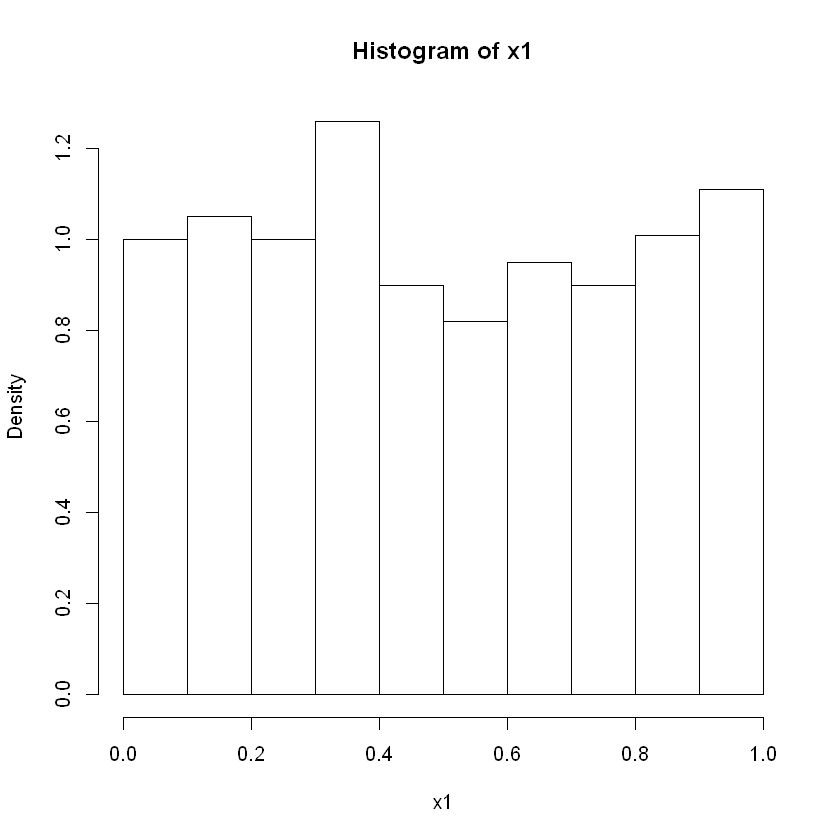

In [5]:
library("entropy")
x1=runif(1000)
hist(x1, xlim=c(0,1), freq=FALSE)
# the integral being equals to 1 is not contradictory to the appearance o fdensity over 1

In [8]:
y1 = discretize(x1, numBins=10, r=c(0,1))
print(entropy(y1))
print(log(10))
# if p_i being 0.1, the empirical entropy should be:
-1/10*log(0.1)

[1] 2.300778
[1] 2.302585


[1] -0.2302585

In [9]:
# 2D joint entropy
x1 = runif(1000)
x2 = runif(1000)
y2d = discretize2d(x1, x2, numBins1=10, numBins2=10)
sum(y2d)
H12 = entropy(y2d )
H12
log(100)

[1] 1000

[1] 4.562121

[1] 4.60517

## Comparison of $H(X)$ and $H^{MM}(X)$

In [9]:
y = c(4, 2, 3, 0, 2, 4, 0, 0, 2, 1, 1) # counts for each bin, here S=8 and n =19
entropy.empirical(y)
entropy.MillerMadow(y)
print("difference between ML and MM estimator")
print(entropy.MillerMadow(y)-entropy.empirical(y))
S=8
n=19
(S-1)/2/n

[1] 1.968382

[1] 2.152593

[1] "difference between ML and MM estimator"
[1] 0.1842105


[1] 0.1842105

In [11]:
# Observations with variable = number of bins (S)
x1=runif(1000)
y1 = discretize(x1, numBins=10, r=c(0,1))
y2 = discretize(x1, numBins=100, r=c(0,1))
entropy.empirical(y1)
entropy.MillerMadow(y1)
entropy.empirical(y2)
entropy.MillerMadow(y2)
print(log(10))
print(log(100))

[1] 2.297176

[1] 2.301676

[1] 4.556132

[1] 4.605632

[1] 2.302585
[1] 4.60517


In [10]:
# Mutual information
mi.empirical(y2d)

[1] 0.03453622

# Estimation of mutual information


In [ ]:
# run once if not installed
#install.packages("devtools")
install.package("rlang")
#remotes::update_packages("rlang") # update rlang

In [8]:
library(devtools)
install_github("sysbiosig/SLEMI")

Warning message:
"package 'devtools' was built under R version 3.6.3"
Loading required package: usethis

Warning message:
"package 'usethis' was built under R version 3.6.3"
Error: package or namespace load failed for 'usethis' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'rlang' 0.4.2 is already loaded, but >= 0.4.3 is required



ERROR: Error: package 'usethis' could not be loaded


rlang (0.4.2 -> 0.4.6) [CRAN]


Installing 1 packages: rlang



package 'rlang' successfully unpacked and MD5 sums checked


ERROR: Error: (converti depuis l'avis) cannot remove prior installation of package 'rlang'
